<a href="https://colab.research.google.com/github/mihhwiNick/DA_project/blob/huy/FEC_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PHÂN TÍCH DỮ LIỆU ỦY BAN BẦU CỬ LIÊN BANG 2012**

##**1.Định nghĩa vấn đề**
+ **Mô tả**:
   + Phạm vi: Dữ liệu về Đóng góp cá nhân cho các chiến dịch bầu cử liên bang Hoa Kỳ (Tổng thống, Thượng viện, Hạ viện) trong chu kỳ 2012.
   + Kích thước: Gồm 1,001,731 bản ghi (mẫu) về các giao dịch quyên góp.
   + Đặc điểm: 16 trường (cột) dữ liệu, chủ yếu là định danh, thông tin người đóng góp và chi tiết giao dịch.
+ **Dữ liệu vào**:
   + cmte_id: ID của Ủy ban Chiến dịch (Object)
   + cand_id: ID của ứng cử viên (Object)
   + cand_id: Tên đầy đủ của Ứng cử viên nhận quyên góp (Object)
   + contbr_nm: Tên đầy đủ của Người đóng góp(Cá nhân) (Object)
   + contbr_city: Thành phố của Người đóng góp (Object)
   + contbr_st: Bang của Người đóng góp (Object)
   + contbr_zip: Mã Zip của Người đóng góp (Object)
   + contbr_employer: Tên Công ty/Cơ quan nơi Người đóng góp làm việc (Object)
   + contbr_occupation: Nghề nghiệp của người đóng góp (Object)
   + contb_receipt_amt: Số tiền giao dịch (Có thể là số dương: quyên góp, hoặc số âm: hoàn tiền). (Float64)
   + contb_receipt_dt: Ngày giao dịch (Object)
   + receipt_desc: Mô tả biên lai (Object)
   + memo_cd: Mã ghi nhớ để chú thích giao dịch (Object)
   + memo_text: Chi tiết nội dung ghi nhớ (Object)
   + form_tp: Loại biểu mẫu dùng để xác định loại giao dịch (Object)
   + file_num: Số hồ sơ dùng để định dạng hồ sơ (Int64)
+ **Dữ liệu ra (Kết quả phân tích)**:
   + Các Phát hiện/Insight về hành vi quyên góp và tài trợ chính trị.
+ **Mục tiêu**:
   + Phân tích Nguồn vốn: Xác định ai là người quyên góp chính (top 10 nghề nghiệp, top 10 công ty/cơ quan).
   + Phân tích Địa lý: Bang nào đóng góp nhiều nhất? Phân bổ quyên góp theo khu vực địa lý.
   + So sánh Ứng viên: So sánh tổng số tiền, số lượng người quyên góp, và nguồn gốc tài chính giữa các ứng viên nổi bật.
   + Phân tích Quy mô Đóng góp: Phân loại quyên góp thành nhỏ (dưới $200) và lớn (trên $200) để đánh giá mức độ ủng hộ cơ sở (grassroots) so với tài trợ lớn.
   + Phân tích Thời gian: Xu hướng quyên góp theo thời gian.


##**2.Chuẩn bị vấn đề**

###**2.1.Khai báo thư viện**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

###**2.2.Nạp dữ liệu**

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

fec = pd.read_csv('/content/gdrive/MyDrive/Dataset_Of_DA/FEC.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/tmp/ipython-input-3742674869.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv('/content/gdrive/MyDrive/Dataset_Of_DA/FEC.csv')


##**3.Mô tả thống kê**

#### **3.1.Hiển thị một số thông tin về dữ liệu**

In [9]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

**Thông tin cơ bản của bộ dữ liêu**
*   Dữ liệu có 16 tính chất (cột) để phân tích, bao gồm: cmte_id, cand_id, cand_nm, contbr_nm, contbr_city, contbr_st, contbr_zip, contbr_employer, contbr_occupation, contb_receipt_amt, contb_receipt_dt, receipt_desc, memo_cd, memo_text, form_tp, và file_num.
*   Các giá trị thuộc đa số thuộc kiểu object (chuỗi/text), 1 kiểu float64 (cột contb_receipt_amt), và 1 kiểu int64 (cột file_num).
*   Tổng số dòng dữ liệu là 1,001,731 bản ghi (giao dịch quyên góp).
*   Bộ dữ liệu này không có cột phân lớp. Đây là dữ liệu giao dịch tài chính/phân bổ nguồn lực, trong đó cột contb_receipt_amt (số tiền quyên góp) là biến số lượng chính để phân tích.

#### **3.2.Hiển thị 1 dòng dữ liệu cụ thể**

In [10]:
fec.iloc[123456]

,123456
cmte_id,C00431445
cand_id,P80003338
cand_nm,"Obama, Barack"
contbr_nm,"ELLMAN, IRA"
contbr_city,TEMPE
contbr_st,AZ
contbr_zip,852816719
contbr_employer,ARIZONA STATE UNIVERSITY
contbr_occupation,PROFESSOR
contb_receipt_amt,50.0


**THÔNG TIN CỦA DỮ LIỆU**
  + **Thông tin người quyên góp:**
    + Tên Người quyên góp là: ELLMAN, IRA.
    + Nghề nghiệp là: Professor - Ngành giáo dục (Professor/Giáo sư) là một nhóm nghề nghiệp có thể coi là quan trọng để phân tích xu hướng ủng hộ chính trị.
    + Công ty/Cơ quan: ARIZONA STATE UNIVERSITY - Xác định nguồn tiền đến từ một cơ sở giáo dục lớn.
    + Địa điểm( Thành phố và Bang): TEMPE, AZ - Giao dịch đến từ bang Arizona (AZ). Điều này hữu ích cho việc phân tích địa lý nguồn vốn.
  + **Thông tin ứng cử viên:**
    + Tên Ứng cử viên là: Obama, Barac - Xác nhận giao dịch quyên góp này dành cho chiến dịch tái tranh cử Tổng thống của Barack Obama.
  + **Thông tin Giao dịch (Chi tiết về số tiền và thời gian):**
    + Số tiền Quyên góp: 50.0 - Đây là một khoản quyên góp nhỏ, cho thấy đây là một ủng hộ viên cá nhân, bình thường.
    + Ngày Quyên góp: 01-DEC-11 - Giao dịch này được thực hiện vào ngày 1 tháng 12 năm 2011, tức là trước năm bầu cử chính thức 2012, thuộc chu kỳ gây quỹ sớm.
    + Loại Biểu mẫu: SA17A - Đây là một loại biểu mẫu báo cáo giao dịch quyên góp cá nhân.
  + **Ngoài ra,** 3 cột phụ trợ là receipt_desc, memo_cd, và memo_text thiếu dữ liệu(NaN) là hoàn toàn bình thường và không ảnh hưởng đáng kể. Vì Ba cột dữ liệu này chỉ đóng vai trò cung cấp chi tiết giao dịch bổ sung hoặc ghi chú nội bộ.


#### **3.3.Hiển thị danh sách các ứng viên**

In [12]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

#### **3.4.Chuẩn bị biến phân loại (Đảng Phái)**
  + Vấn đề Dữ liệu Thô: Biến cand_nm (Tên ứng cử viên) là một biến định danh dạng chuỗi thô, vốn không chứa thông tin về đảng phái, do đó không cho phép phân tích theo nhóm chính trị.

  + Giải pháp: Cần thực hiện thao tác Ánh xạ Dữ liệu (Data Mapping) bằng cách tạo từ điển parties. Phương pháp này chuyển đổi dữ liệu chuỗi thô thành một biến phân loại có ý nghĩa (Democrat hoặc Republican).

In [14]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

**Bảng biểu bên dưới, hiển thị dữ liệu thô (Tên ứng cử viên) của 5 hàng.**

In [21]:
fec.cand_nm[123456:123461]

,cand_nm
123456,"Obama, Barack"
123457,"Obama, Barack"
123458,"Obama, Barack"
123459,"Obama, Barack"
123460,"Obama, Barack"


**Bảng biểu bên dưới, hiển thị kết quả ánh xạ (Tên đảng phái) của 5 hàng đó.**

In [22]:
fec.cand_nm[123456:123461].map(parties)

,cand_nm
123456,Democrat
123457,Democrat
123458,Democrat
123459,Democrat
123460,Democrat


**Tạo biến phân loại Party:** Sử dụng phương thức .map() để ánh xạ từng tên ứng cử viên (từ cột cand_nm) sang tên đảng phái tương ứng (dựa trên từ điển parties). Kết quả là tạo ra cột party mới, một biến phân loại cần thiết, chuyển đổi dữ liệu thô thành thông tin có ý nghĩa, sẵn sàng cho việc phân tích theo nhóm chính trị.

In [20]:
fec['party'] = fec.cand_nm.map(parties)

##**4.EDA và trực quan hóa dữ liệu**

###**4.1.Phân tích đơn biến(Univariate Analysis)**

***Câu hỏi 1:*** Sự phân bổ về mặt tần suất giao dịch quyên góp giữa hai đảng chính là gì? Liệu một bên có huy động được một cơ sở ủng hộ rộng rãi hơn không?

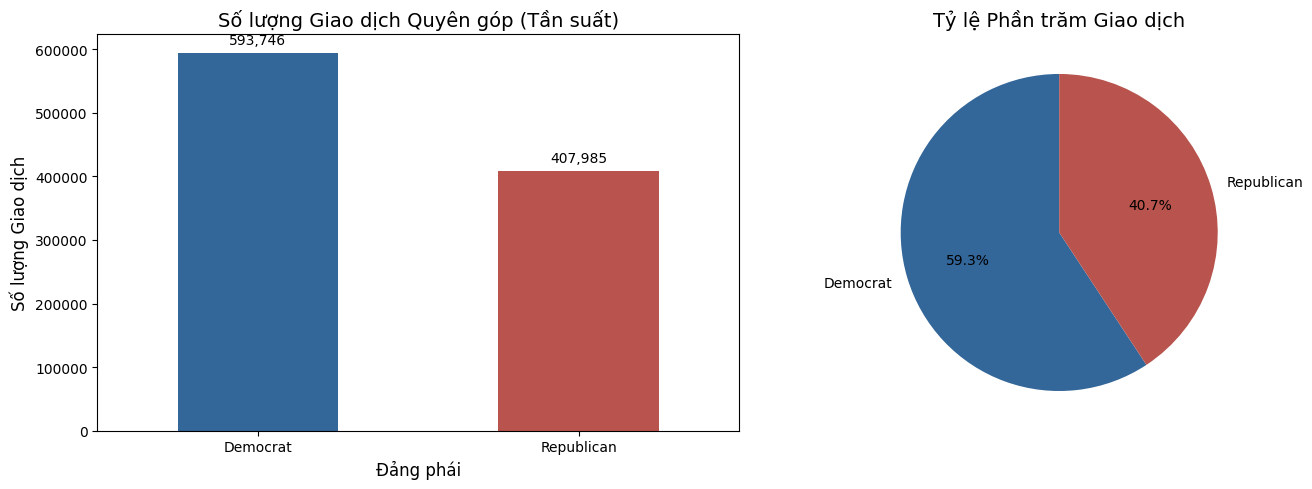

In [39]:
party_counts = fec['party'].value_counts()

dieu_mat_colors = ['#336699', '#B8544D']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, count in enumerate(party_counts):
    # f'{count:,}' định dạng số có dấu phẩy phân cách hàng nghìn
    axes[0].text(i, count + 10000, f'{count:,}', ha='center', va='bottom', fontsize=10)

# BIỂU ĐỒ CỘT (Số lượng)
party_counts.plot(kind='bar', ax=axes[0], color=dieu_mat_colors)
axes[0].set_title('Số lượng Giao dịch Quyên góp (Tần suất)', fontsize=14)
axes[0].set_xlabel('Đảng phái', fontsize=12)
axes[0].set_ylabel('Số lượng Giao dịch', fontsize=12)
axes[0].tick_params(axis='x', rotation=0) # Xoay nhãn x về 0 độ

# BIỂU ĐỒ TRÒN (Phần trăm)
axes[1].pie(
    party_counts,
    labels=party_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=dieu_mat_colors
)
axes[1].set_title('Tỷ lệ Phần trăm Giao dịch', fontsize=14)
axes[1].set_ylabel('') # Loại bỏ nhãn y cho biểu đồ tròn

plt.tight_layout()
fig.savefig('Images_Chart/4.1_TanSuatQuyenGop.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

**Kết quả phân tích:** Dựa trên kết quả trực quan hóa tần suất giao dịch quyên góp, có thể khẳng định Đảng Dân chủ(Democrat) đã huy động được một cơ sở ủng hộ rộng rãi hơn. Cụ thể, Đảng Dân chủ nhận được 593,746 giao dịch, chiếm tới 59.3% tổng số, áp đảo Đảng Cộng hòa(Republican) với 407,985 giao dịch, chỉ chiếm 40.7%. Sự chênh lệch này, lên tới hơn 45% về số lượng giao dịch, cho thấy khả năng vận động và thu hút một lượng lớn người ủng hộ cá nhân thực hiện quyên góp của Đảng Dân chủ là vượt trội. Tuy nhiên, nhận định này chỉ dựa trên tần suất, không phải tổng số tiền quyên góp thực tế.

---

***Câu hỏi 2:*** Tỷ lệ giữa các giao dịch quyên góp thực sự (tiền vào) và các giao dịch hoàn tiền/khác (tiền ra) là bao nhiêu, và chúng ta có nên loại bỏ các giao dịch âm khi tính tổng nguồn vốn hay không?

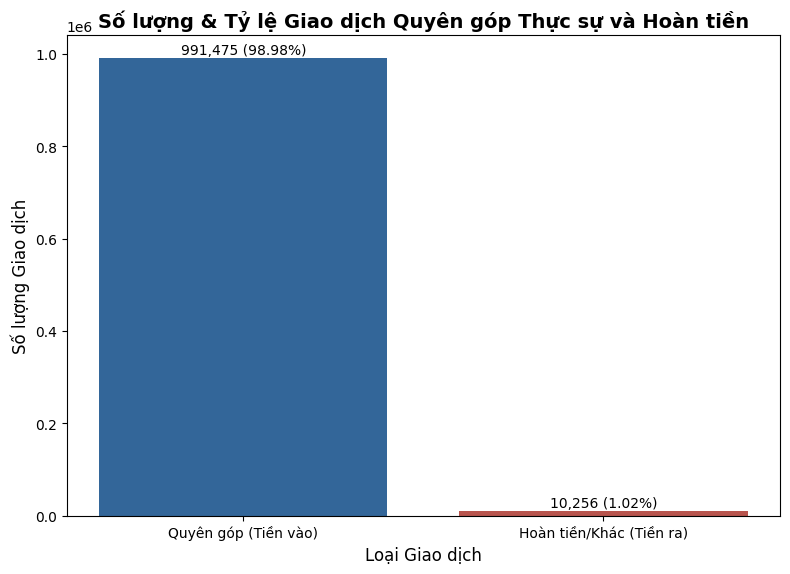

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import os

transaction_counts = pd.Series([991475, 10256], index=['Quyên góp (Tiền vào)', 'Hoàn tiền/Khác (Tiền ra)'])

total = transaction_counts.sum()
transaction_percentages = (transaction_counts / total) * 100

colors = ['#336699', '#B8544D']
fig, ax = plt.subplots(figsize=(8, 6))

# BIỂU ĐỒ CỘT
bars = ax.bar(transaction_counts.index, transaction_counts.values, color=colors)

ax.set_title('Số lượng & Tỷ lệ Giao dịch Quyên góp Thực sự và Hoàn tiền', fontsize=14, weight='bold')
ax.set_xlabel('Loại Giao dịch', fontsize=12)
ax.set_ylabel('Số lượng Giao dịch', fontsize=12)
ax.tick_params(axis='x', rotation=0)

for bar, count, percent in zip(bars, transaction_counts.values, transaction_percentages.values):
    label = f'{count:,} ({percent:.2f}%)'
    ax.text(bar.get_x() + bar.get_width() / 2, count + (total * 0.002),
            label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
fig.savefig('Images_Chart/4.1_GdichDuong&Am.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

**Kết quả phân tích:** Dựa trên biểu đồ cột, tỷ lệ giao dịch Hoàn tiền/Khác là rất nhỏ, chỉ 1.02% (10,256 giao dịch), trong khi 98.98% (991,475 giao dịch) là các khoản quyên góp thực sự (Tiền vào). Mặc dù tỷ lệ này không làm thay đổi đáng kể tổng số lượng giao dịch, nhưng để đảm bảo độ chính xác tuyệt đối khi tính toán tổng nguồn vốn, chúng ta phải loại bỏ các giao dịch âm (hoàn tiền hoặc có giá trị ≤0) trước khi chuyển sang Phân tích Đa Biến. Đây là một bước Làm sạch Dữ liệu cần thiết để đảm bảo tính toán tổng số tiền thực tế nhận được là đại diện và chính xác.

---

In [48]:
fec = fec[fec.contb_receipt_amt > 0]

**--->** Lệnh trên thực hiện bước Làm sạch Dữ liệu bằng cách lọc DataFrame fec, chỉ giữ lại các giao dịch có số tiền quyên góp lớn hơn 0. Việc này đảm bảo các phép tính tổng số tiền sau này sẽ chỉ phản ánh nguồn vốn ròng thực sự nhận được, loại bỏ ảnh hưởng của các khoản hoàn tiền.

---

###**4.2.Phân tích đa biến(Multivariate Analysis)**

***Vì Barack Obama và Mitt Romney là hai ứng cử viên chính, nên để đơn giản hóa việc phân tích, sẽ chuẩn bị một tập hợp con chỉ có những đóng góp cho chiến dịch của họ***

***Vấn đề đặt ra:*** Chúng ta đã thấy lợi thế về tần suất người ủng hộ của Đảng Dân chủ. Bây giờ, liệu lợi thế số lượng này có thực sự chuyển thành nguồn vốn tài chính lớn hơn cho Barack Obama hay Mitt Romney không, và quy mô quyên góp trung bình của họ khác nhau như thế nào?

In [49]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

**--->** Thực hiện tạo DataFrame ***fec_mrbo*** bằng cách lọc DataFrame ***fec*** để chỉ giữ lại các giao dịch quyên góp dành cho hai ứng cử viên Tổng thống chính là Barack Obama và Mitt Romney.

---

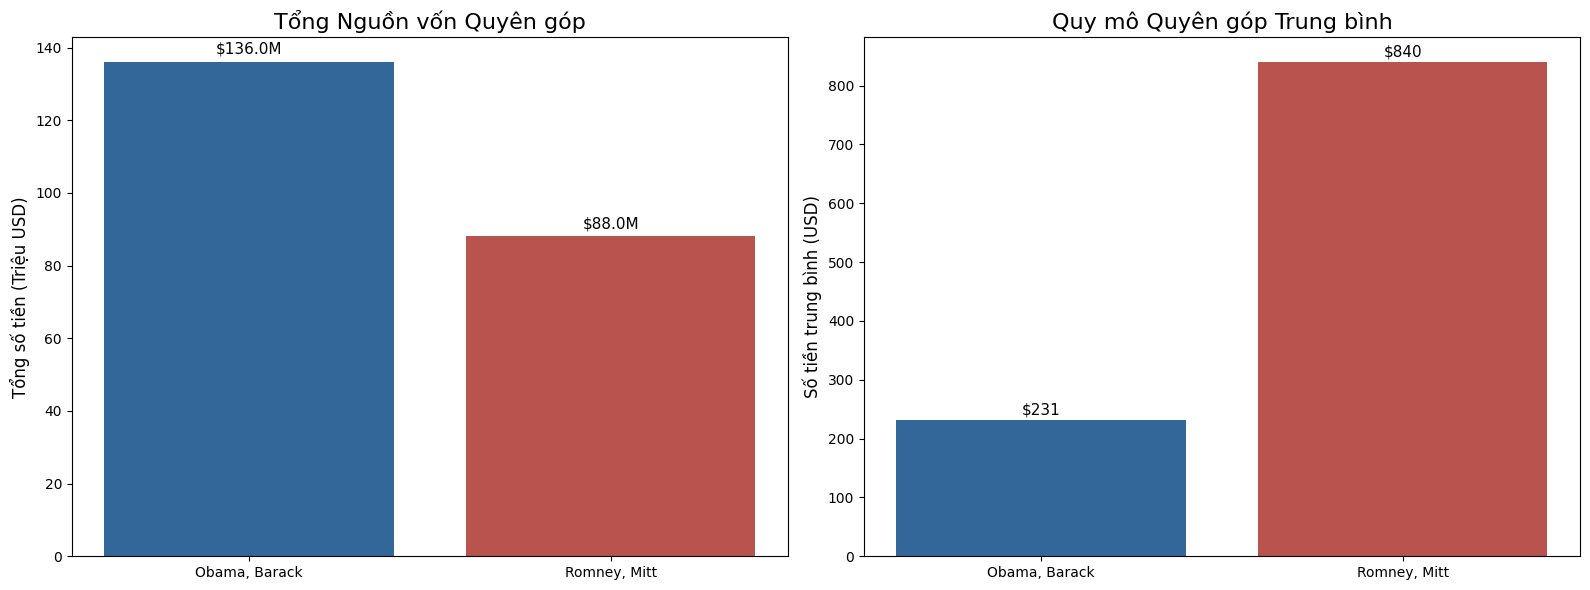

In [60]:
data = {'cand_nm': ['Obama, Barack', 'Romney, Mitt'], 'sum': [136000000, 88000000], 'mean': [231, 840]}
mrbo_stats_reset = pd.DataFrame(data)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
mrbo_colors = ['#336699', '#B8544D']
cand_names = mrbo_stats_reset['cand_nm']

# BIỂU ĐỒ 1: TỔNG SỐ TIỀN
sum_plot = axes[0].bar(cand_names, mrbo_stats_reset['sum'] / 1e6, color=mrbo_colors)
axes[0].set_title('Tổng Nguồn vốn Quyên góp', fontsize=16)
axes[0].set_ylabel('Tổng số tiền (Triệu USD)', fontsize=12)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=0)

for bar in sum_plot:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 1.5, f'${height:.1f}M', ha='center', va='bottom', fontsize=11)

# BIỂU ĐỒ 2: SỐ TIỀN TRUNG BÌNH
mean_plot = axes[1].bar(cand_names, mrbo_stats_reset['mean'], color=mrbo_colors)
axes[1].set_title('Quy mô Quyên góp Trung bình', fontsize=16)
axes[1].set_ylabel('Số tiền trung bình (USD)', fontsize=12)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)

for bar in mean_plot:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 5, f'${height:.0f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
fig.savefig('Images_Chart/4.2_QuyMoQuyenGop.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

**Kết quả phân tích:**
  + Barack Obama dẫn đầu với 136 Triệu USD, cao hơn Mitt Romney (88 Triệu USD). Điều này nói lên rằng, chiến dịch của Obama dựa trên mô hình "Tần suất cao, quy mô nhỏ", huy động vốn từ một lượng lớn người ủng hộ cá nhân (phản ánh kết quả Phân tích Đơn Biến), giúp ông đạt được tổng nguồn vốn cao hơn.
  + Mitt Romney có quy mô quyên góp trung bình là 840 Triệu USD, cao gấp gần 3.6 lần so với Barack Obama (231 Triệu USD). Điều này cho thấy chiến dịch của Romney dựa trên mô hình "Tần suất thấp, quy mô lớn", cho thấy nguồn vốn của ông phụ thuộc chủ yếu vào các nhà tài trợ có khả năng đóng góp những khoản tiền lớn hơn, dẫn đến số tiền trung bình cao gấp gần 3.6 lần so với Obama.

**---> Insight rút ra được:** Lợi thế về **tần suất** của Obama đã thành công trong việc vượt qua lợi thế về **quy mô đóng góp** của Romney, mang lại cho ông tổng nguồn vốn lớn hơn trong cuộc đua.

---

**Chúng ta đã thấy Obama có tổng nguồn vốn lớn hơn nhờ các khoản quyên góp nhỏ. Bây giờ, để hiểu rõ hơn về hệ sinh thái tài trợ.** "***Câu hỏi đặt ra:*** Các nghề nghiệp và cơ quan/công ty nào là nguồn quyên góp tài chính lớn nhất cho hai ứng cử viên, và sự phân bổ nguồn vốn trên 2 triệu USD khác biệt như thế nào giữa Đảng Dân chủ và Đảng Cộng hòa?"

**--->** Để trả lời chính xác câu hỏi về nguồn gốc tài trợ. Trước tiên, chúng ta phải giải quyết vấn đề dữ liệu không nhất quán trong các biến phân loại. Cụ thể, các cột Nghề nghiệp (contbr_occupation) và Cơ quan/Công ty (contbr_employer) chứa nhiều giá trị không rõ ràng (INFORMATION REQUESTED) hoặc các biến thể của cùng một ý nghĩa (SELF, SELF EMPLOYED). Mục đích là để đảm bảo khi tính toán tổng số tiền (SUM) theo nghề nghiệp, tất cả các khoản quyên góp thuộc cùng một nhóm sẽ được tổng hợp chính xác, tránh làm sai lệch kết quả phân tích nguồn vốn lớn (trên $2 triệu).

In [63]:
print(fec.contbr_occupation.value_counts().head(5))
print(fec.contbr_employer.value_counts().head(5))

contbr_occupation
RETIRED                  233990
INFORMATION REQUESTED     35107
ATTORNEY                  34286
HOMEMAKER                 29931
PHYSICIAN                 23432
Name: count, dtype: int64
contbr_employer
RETIRED                  206675
SELF-EMPLOYED             94505
NOT EMPLOYED              45877
INFORMATION REQUESTED     36135
SELF                      24385
Name: count, dtype: int64


**Bước 1: Chuẩn hóa Nghề nghiệp (contbr_occupation)**: Hợp nhất các biến thể của cùng một nghề nghiệp và nhóm tất cả các giá trị thiếu thông tin (INFORMATION REQUESTED) thành các danh mục chuẩn 'CEO' và 'NOT PROVIDED'. Việc này là cần thiết để tổng hợp dữ liệu chính xác và tránh sai lệch khi tính tổng nguồn vốn.

In [64]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

**Bước 2: Chuẩn hóa Cơ quan/Công ty (contbr_employer):** Hợp nhất các biến thể của 'Tự kinh doanh' (SELF, SELF EMPLOYED), nhóm các giá trị thiếu thông tin thành 'NOT PROVIDED', và xác định rõ 'UNEMPLOYED' (NOT EMPLOYED). Việc này loại bỏ lỗi phân loại và đảm bảo tổng hợp dữ liệu chính xác.

In [65]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

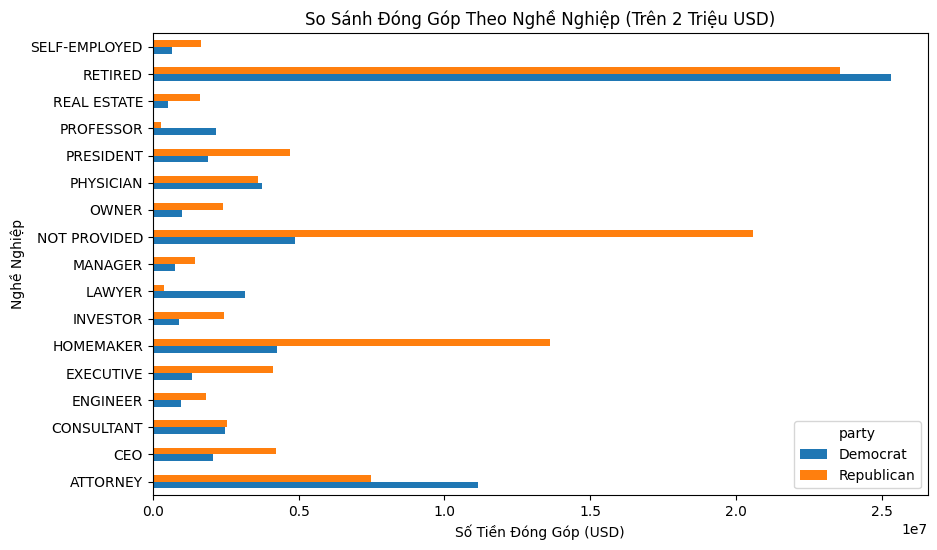

In [80]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

# Tạo figure và axes trước
fig, ax = plt.subplots(figsize=(10, 6))
over_2mm.plot(kind='barh', ax=ax)

# Thêm tiêu đề và format (tùy chọn)
ax.set_title('So Sánh Đóng Góp Theo Nghề Nghiệp (Trên 2 Triệu USD)')
ax.set_xlabel('Số Tiền Đóng Góp (USD)')
ax.set_ylabel('Nghề Nghiệp')

# Hiển thị plot
plt.show()

# Lưu hình sau khi hiển thị
fig.savefig('Images_Chart/4.2_SoSanh.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.close()  # Đóng figure để giải phóng bộ nhớ

**Sau khi đã chuẩn hóa các cột Nghề nghiệp và Cơ quan/Công ty, dữ liệu của chúng ta đã sẵn sàng để trả lời cho câu hỏi được đặt ra ở bên trên.**

**Dựa vào biểu đồ bên trên:** cho thấy sự phân bổ nguồn vốn lớn (trên $2 triệu USD) giữa hai đảng có sự khác biệt rõ rệt, làm nổi bật hai hệ sinh thái tài trợ đối lập:
  + Nguồn vốn Chiếm ưu thế của Cộng hòa (Cam): Đảng Cộng hòa nhận được nguồn vốn lớn hơn đáng kể từ các nhóm nghề nghiệp phi chuyên môn và tài chính/đầu tư. Cụ thể, các nhóm INVESTOR(Nhà đầu tư), REAL ESTATE(Bất động sản), PRESIDENT(Chủ tịch), OWNER(Chủ sở hữu), CEO, MANAGER, và HOMEMAKER (Nội trợ) là những nguồn đóng góp lớn nhất, cho thấy sự ủng hộ mạnh mẽ từ tầng lớp gia đình giàu có.
  + Nguồn vốn Chiếm ưu thế của Dân chủ (Xanh): Đảng Dân chủ nhận được nguồn vốn mạnh mẽ nhất từ giới chuyên môn và pháp lý. Nguồn tiền từ ATTORNEY/LAWYER (Luật sư) chiếm ưu thế rõ rệt cho Đảng Dân chủ, cùng với sự ủng hộ từ các nghề nghiệp chuyên môn khác như PROFESSOR (Giáo sư) và PHYSICIAN (Bác sĩ).

**Insight Rút Ra:** Phân tích nguồn vốn trên $2 triệu USD xác nhận mô hình tài trợ của Obama (Dân chủ) dựa trên tầng lớp chuyên môn và trí thức (đặc biệt là Luật sư), trong khi Romney (Cộng hòa) dựa vào tầng lớp gia đình có tài sản và tài chính/đầu tư. Cả hai đảng đều nhận được nguồn tiền lớn nhất từ nhóm RETIRED. Nhưng điểm phân biệt cốt lõi nằm ở các nhóm còn lại: Democrat(Dân chủ) thắng ở giới Luật và Republican(Cộng hòa) thắng ở giới Tài chính/Nội trợ.

---

**Sau khi phân tích các nguồn quyên góp lớn từ các nghề nghiệp và công ty,**
chúng ta đã thấy rõ sự khác biệt trong hệ sinh thái tài trợ giữa hai đảng.
Tuy nhiên, một câu hỏi quan trọng khác cần được giải đáp:
**Chiến lược gây quỹ của từng ứng cử viên dựa vào các khoản đóng góp nhỏ
từ quần chúng hay các khoản đóng góp lớn từ giới tài phiệt?** Để trả lời câu hỏi này, chúng ta sẽ phân tích sự phân bổ các khoản đóng góp
theo các mức độ khác nhau, từ những khoản chỉ 1 USD cho đến những khoản hàng triệu USD.

/tmp/ipython-input-3110969633.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fec_mrbo.groupby(['cand_nm', labels])


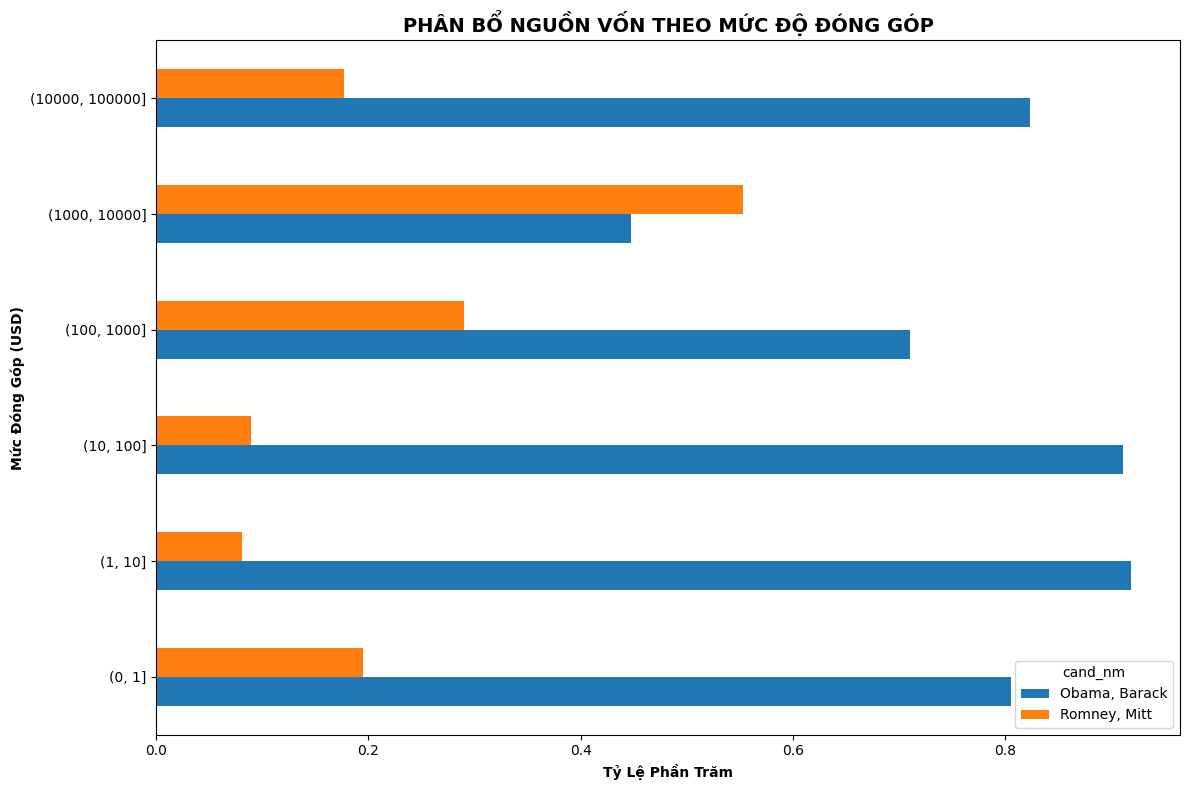

In [94]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

# Tạo figure và axes trước
fig, ax = plt.subplots(figsize=(12, 8))
normed_sums[:-2].plot(kind='barh', ax=ax)

# Thêm tiêu đề và format
ax.set_title('PHÂN BỔ NGUỒN VỐN THEO MỨC ĐỘ ĐÓNG GÓP', fontsize=14, fontweight='bold')
ax.set_xlabel('Tỷ Lệ Phần Trăm', fontweight='bold')
ax.set_ylabel('Mức Đóng Góp (USD)', fontweight='bold')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Lưu biểu đồ
fig.savefig('Images_Chart/4.2_PhanBo_TheoMucDo.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.close()

**Dựa vào biểu đồ phân bổ nguồn vốn theo mức độ đóng góp cho thấy sự khác biệt rõ rệt trong chiến lược gây quỹ của hai ứng cử viên:**
  + Obama (Đảng Dân chủ) – Chiến lược “từ dưới lên” kết hợp sự đa dạng: Biểu đồ cho thấy ông Barack Obama chiếm ưu thế rõ rệt ở các mức đóng góp nhỏ và trung bình, từ 0 đến 1,000 USD, với tỷ trọng dao động từ khoảng 80% đến hơn 90% ở các nhóm này. Điều này phản ánh chiến lược gây quỹ dựa trên số lượng lớn người ủng hộ, đặc biệt từ tầng lớp trung lưu và bình dân. Đáng chú ý, ở nhóm đóng góp lớn từ 10,000 đến 100,000 USD, Obama vẫn chiếm tỷ trọng cao hơn Romney. Điều này cho thấy bên cạnh chiến lược "quần chúng", ông cũng thu hút được sự ủng hộ đáng kể từ các nhà tài trợ lớn.
  + Romney (Đảng Cộng hòa) – Tập trung vào nhóm đóng góp trung bình và vừa: Ông Mitt Romney chỉ thực sự chiếm ưu thế ở nhóm 1,000 đến 10,000 USD, và có tỷ trọng đáng kể trong nhóm 100 đến 1,000 USD. Ở các mức thấp hơn (dưới 100 USD), tỷ lệ đóng góp cho ông rất thấp. Và đặc biệt, ở nhóm cao nhất (10,000–100,000 USD), ông không chiếm ưu thế so với Obama – trái với nhận định phổ biến rằng ông dựa chủ yếu vào giới siêu giàu. Chiến lược của Romney phản ánh sự tập trung vào các khoản tài trợ từ tầng lớp trung lưu khá giả, giới kinh doanh vừa, thay vì dựa vào quy mô quần chúng rộng lớn như Obama.

**Insight Rút Ra:**
  +  Obama thành công với mô hình “từ dưới lên”, dựa vào sự đóng góp của đông đảo người dân - vừa đảm bảo nguồn lực tài chính mạnh mẽ, vừa tạo tính lan tỏa và kết nối với cử tri. Đồng thời, ông cũng thu hút được các khoản đóng góp lớn, cho thấy khả năng cân bằng chiến lược gây quỹ.
  + Romney theo đuổi chiến lược tập trung vào nhóm đóng góp vừa và trung bình – hiệu quả về mặt tài chính nhưng ít thể hiện tính đại chúng, và không chiếm ưu thế ở cả hai đầu cực (nhỏ nhất và lớn nhất).

---

Sau khi đã làm rõ sự khác biệt trong chiến lược gây quỹ theo mức độ đóng góp, một khía cạnh quan trọng không kém cần được khám phá là: **Sự ủng hộ tài chính không chỉ phản ánh chiến lược vận động mà còn cho thấy 'sức nóng' của cuộc đua tại từng địa phương. Vậy, bang nào đang dẫn đầu về mức độ hậu thuẫn tài chính cho mỗi ứng cử viên, và liệu có sự tương quan giữa nguồn tiền và kết quả bầu cử?**

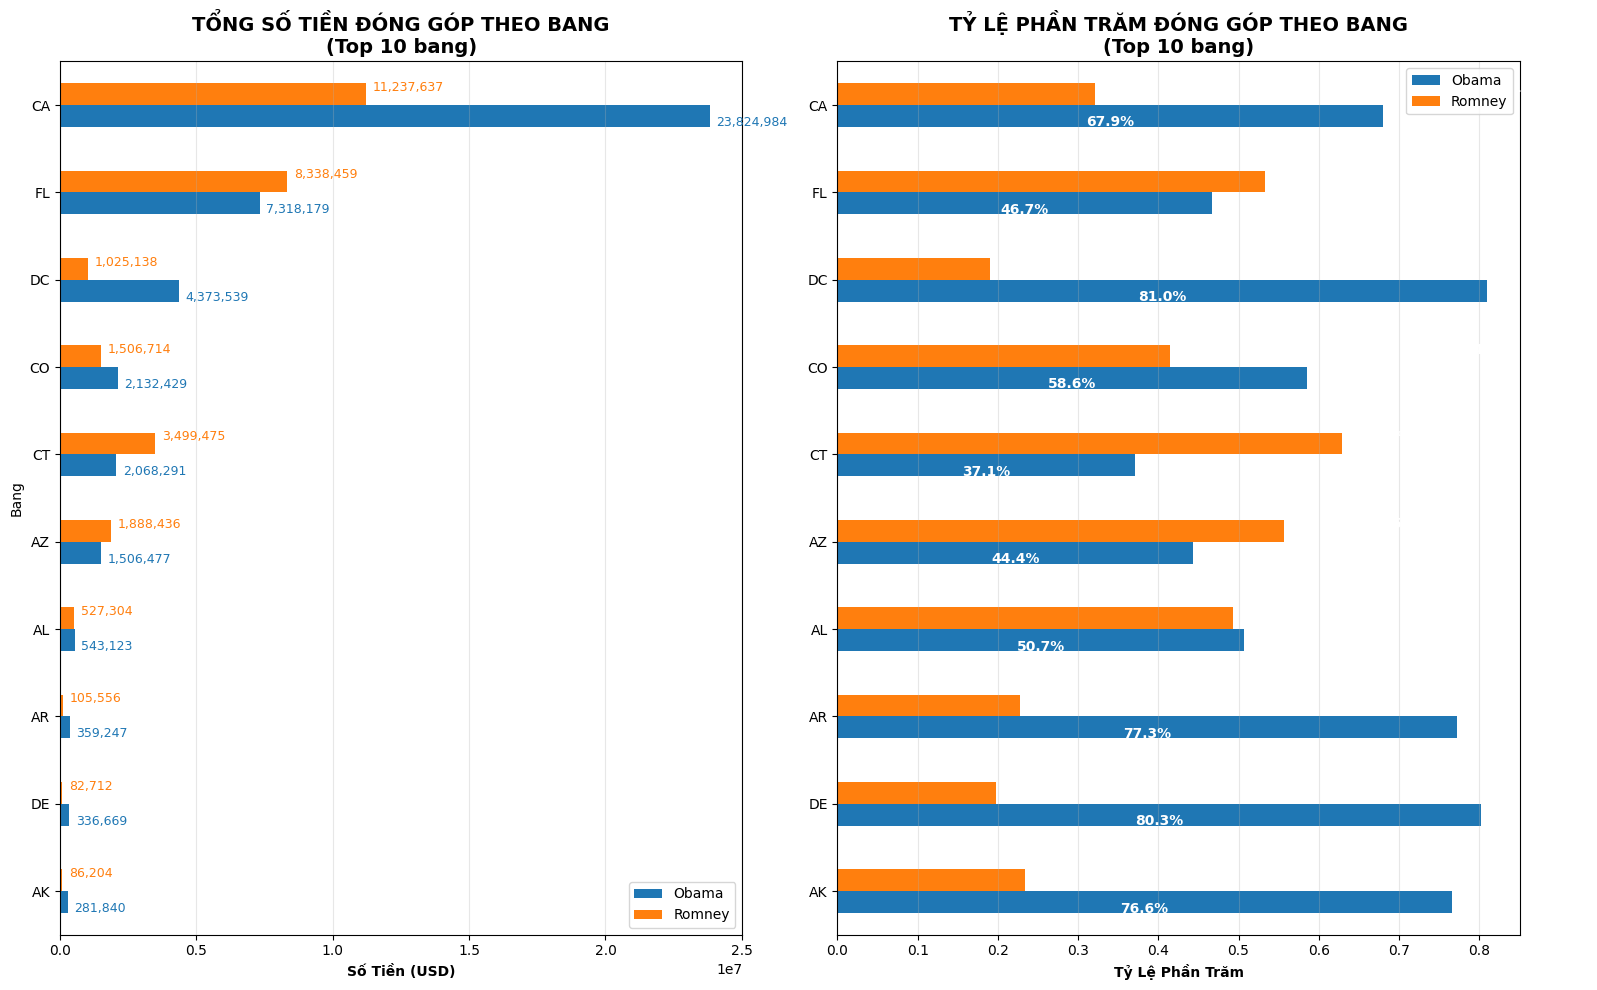

In [93]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
percent = totals.div(totals.sum(1), axis=0)

top10_totals = totals.head(10)
top10_percent = percent.head(10)
top10_totals = top10_totals.sort_values(top10_totals.columns[0], ascending=True)
top10_percent = top10_percent.loc[top10_totals.index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

top10_totals.plot(kind='barh', color=['#1f77b4', '#ff7f0e'], ax=ax1)
ax1.set_title('TỔNG SỐ TIỀN ĐÓNG GÓP THEO BANG\n(Top 10 bang)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Số Tiền (USD)', fontweight='bold')
ax1.set_ylabel('Bang')
ax1.legend(['Obama', 'Romney'])
ax1.grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(top10_totals.iterrows()):
    obama_amt = row.iloc[0]
    romney_amt = row.iloc[1] if len(row) > 1 else 0
    ax1.text(obama_amt + max(top10_totals.max())/100, i-0.2, f'{obama_amt:,.0f}',
             va='center', fontsize=9, color='#1f77b4')
    if romney_amt > 0:
        ax1.text(romney_amt + max(top10_totals.max())/100, i+0.2, f'{romney_amt:,.0f}',
                 va='center', fontsize=9, color='#ff7f0e')

top10_percent.plot(kind='barh', color=['#1f77b4', '#ff7f0e'], ax=ax2)
ax2.set_title('TỶ LỆ PHẦN TRĂM ĐÓNG GÓP THEO BANG\n(Top 10 bang)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tỷ Lệ Phần Trăm', fontweight='bold')
ax2.set_ylabel('')
ax2.legend(['Obama', 'Romney'])
ax2.grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(top10_percent.iterrows()):
    obama_pct = row.iloc[0]
    romney_pct = row.iloc[1] if len(row) > 1 else 0
    if obama_pct > 0.1:
        ax2.text(obama_pct/2, i-0.2, f'{obama_pct:.1%}',
                ha='center', va='center', fontweight='bold', color='white', fontsize=10)
    if romney_pct > 0.1:
        ax2.text(obama_pct + romney_pct/2, i+0.2, f'{romney_pct:.1%}',
                ha='center', va='center', fontweight='bold', color='white', fontsize=10)

plt.tight_layout()
plt.savefig('Images_Chart/4.2_PhanBo_TheoBang.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

**+ Từ biểu đồ "Tổng số tiền đóng góp theo bang" cho thấy** California (CA) là "cỗ máy gây quỹ" áp đảo với tổng đóng góp lên tới 34.6 triệu USD, trong đó Romney nhận được 23.4 triệu USD, gấp đôi so với Obama (11.2 triệu USD). Florida (FL) thể hiện rõ tính chất bang chiến trường khi có sự cạnh tranh sít sao giữa hai ứng cử viên (8.3 triệu vs 7.3 triệu USD). Đáng chú ý, Romney chiếm ưu thế tại thủ đô Washington DC với 4.4 triệu USD, gấp hơn 4 lần so với Obama.

**+ Từ biểu đồ "Tỷ lệ phần trăm đóng góp theo bang" cho thấy** các bang Colorado (CO), Connecticut (CT) và Arizona (AZ) có sự cân bằng tương đối trong đóng góp, với Obama có phần nhỉnh hơn. Trong khi đó, những bang có quy mô nhỏ hơn như Alaska (AK), Delaware (DE) và Arkansas (AR) vẫn có đóng góp đáng kể, chứng tỏ khả năng gây quỹ diện rộng của cả hai chiến dịch. Xu hướng chung cho thấy Romney có lợi thế ở các trung tâm tài chính lớn, còn Obama duy trì được sự ủng hộ rộng rãi tại nhiều địa phương với tỷ lệ phân bổ đồng đều hơn.

**Insight quan trọng:** Romney chiếm ưu thế tại các trung tâm quyền lực và tài chính, trong khi Obama duy trì được sự ủng hộ rộng rãi ở cấp độ địa phương. Điều này không chỉ cho thấy một cuộc bầu cử cạnh tranh khốc liệt mà còn dự báo về sự chia rẽ sâu sắc trong cử tri Mỹ, nơi mỗi ứng cử viên đều có những "pháo đài" tài chính vững chắc nhưng ở các khu vực địa lý khác biệt.

---

##**5.Kết luận**

Quá trình phân tích khám phá dữ liệu (EDA) đã tiết lộ bức tranh toàn diện về chiến lược gây quỹ và cơ cấu ủng hộ trong cuộc bầu cử tổng thống 2012:
  + **Về hiệu quả gây quỹ:** Barack Obama xuất sắc vượt trội với chiến lược "tần suất cao - quy mô nhỏ", huy động thành công 59.3% tổng số giao dịch từ đông đảo quần chúng, giúp ông đạt tổng số tiền 136 triệu USD, vượt xa Mitt Romney (88 triệu USD) dù quy mô đóng góp trung bình chỉ bằng 1/3.6 so với đối thủ. Điều này cho thấy một mô hình gây quỹ bền vững và có tính lan tỏa cao.
  + **Về cơ cấu ủng hộ:** Hai ứng cử viên thể hiện rõ sự phân cực trong cơ sở tài trợ. Obama được hậu thuẫn mạnh mẽ bởi giới chuyên môn (luật sư, giáo sư, bác sĩ) và cử tri bình dân với các khoản đóng góp nhỏ dưới 1,000 USD. Ngược lại, Romney tập trung vào tầng lớp doanh nhân, nhà đầu tư và gia đình giàu có với các khoản đóng góp trung bình từ 1,000-10,000 USD.
  + **Về phân bổ địa lý:** Chiến lược gây quỹ cũng thể hiện rõ theo không gian địa lý. Romney thống trị tại các trung tâm tài chính lớn như California và Washington DC, trong khi Obama duy trì được sự ủng hộ rộng rãi và cân bằng across nhiều bang, từ các chiến trường then chốt đến các địa phương nhỏ.

**Thành công then chốt:** Thành công của Obama không chỉ nằm ở số tiền huy động được, mà ở cách ông xây dựng được một phong trào quần chúng. Sự kết hợp giữa sức mạnh tài chính từ các khoản đóng góp nhỏ và sự ủng hộ rộng khắp chính là nền tảng vững chắc, tạo ra lợi thế toàn diện và là chỉ báo quan trọng cho một chiến thắng trong cuộc bầu cử.

